In [2]:
## Let's import necessary python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
## Now import the dataset
data_train = pd.read_csv("Dataset/train.csv")
data_test = pd.read_csv("Dataset/Test.csv")
data_val = pd.read_csv("Dataset/Valid.csv")

In [7]:
data_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
data_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [9]:
data_val.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


#### After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE

In [10]:
data_train.count()

text     40000
label    40000
dtype: int64

In [11]:
data_test.count()

text     5000
label    5000
dtype: int64

In [12]:
data_val.count()

text     5000
label    5000
dtype: int64

### Data Visualization

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

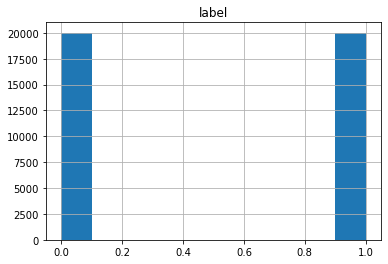

In [13]:
data_train.hist()

#### From the histogram, we found that we have a balanced views, so our dataset is balanced dataset

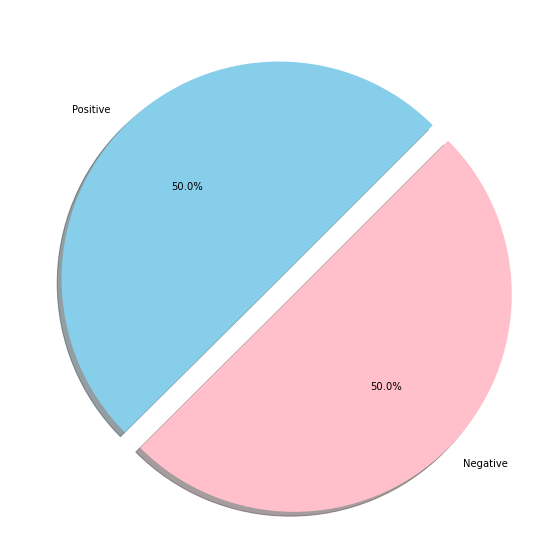

In [15]:
fig=plt.figure(figsize=(10,10))
colors=["skyblue",'pink']
pos=data_train[data_train['label']==1]
neg=data_train[data_train['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

#### Now let's clean our dataset. Remove emijis, html tags and replace it with empty string(spaces)

In [16]:
import re
def preprocessor(text):
     text=re.sub('<[^>]*>','',text)
     emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
     text=re.sub('[\W]+',' ',text.lower()) +\
        ' '.join(emojis).replace('-','')
     return text  


data_train['text']=data_train['text'].apply(preprocessor)

In [18]:
data_train["text"][:5]

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

#### Let's tockenize our dataset to remove the word complexities and convert the words into their root word

In [20]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
    
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#### Let's remove the unnecessary words i.e. stopwords from the sentiments that will add any value to the dataset to classify into into corresponding labels

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshmali/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

#### Let's use wordcloud to visualize positive and negative words from our dataset

Positive words are as follows


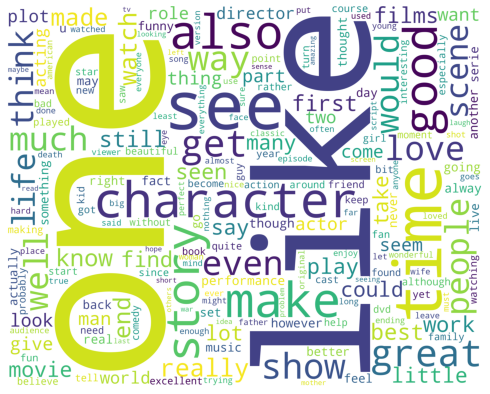

Negative words are as follows


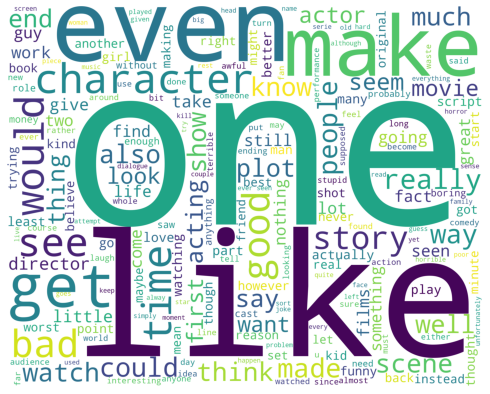

In [32]:
from wordcloud import WordCloud
positivedata = data_train[ data_train['label'] == 1]
positivedata =positivedata['text']
negdata = data_train[data_train['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data_train, color = 'white'):
    words = ' '.join(data_train)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

#### The positive words that are highlighted are love, excellent, perfect, good, beautiful, kind, excellent and The negative words that are highlighted are: horrible, wasteful, problem, stupid, horrible, bad, poor.

### Feature Engineering

#### Now we will use the TF-IDF Vertorizer to convert the raw documents into feature matrix which is very important to train a Machine Learning model

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data_train.label.values
x=tfidf.fit_transform(data_train.text)

### Training the Machine Learning Model

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [51]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=0,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

### Let's check the accuracy of the model

In [52]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89045
